### Practicing CNN and its different models
In this notebook I will be using Lenet5 for classification purpose.

In [1]:
#importing Libraries
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
dataset = keras.datasets.mnist

In [4]:
type(dataset)

module

In [5]:
(x_train,y_train),(x_test,y_test) = dataset.load_data()

11493376/11490434 [==============================] - 6s 1us/step


### Data exploration

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_test.shape

(10000, 28, 28)

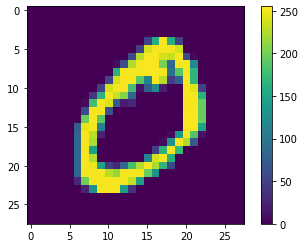

In [12]:
plt.imshow(x_train[1])
plt.colorbar()

In [13]:
X_train = x_train/255
X_test = x_test/255


In [36]:
X_train = X_train.reshape([60000,28,28,1])

In [45]:
X_test = X_test.reshape([10000,28,28,1])

3


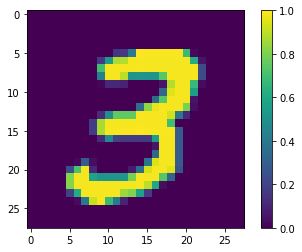

In [16]:
plt.imshow(X_train[7])
plt.colorbar()
print(y_train[7])

### Model Development

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,AveragePooling2D,MaxPooling2D,Conv2D, Dropout

In [46]:
model_1 = Sequential()

In [47]:
model_1.add(Conv2D(filters =6, kernel_size = (3,3), padding = 'same',activation ='relu', input_shape = (28,28,1)))
model_1.add(AveragePooling2D())
model_1.add(Conv2D(filters = 16, kernel_size =(3,3), activation = 'relu'))
model_1.add(AveragePooling2D())
model_1.add(Flatten())
model_1.add(Dense(120,activation = 'relu'))
model_1.add(Dense(84,activation = 'relu'))
model_1.add(Dense(10,activation = 'softmax'))

In [50]:
model_1.compile(optimizer='adam',loss ='sparse_categorical_crossentropy',metrics= ['accuracy'] )

In [27]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         60        
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 16)        880       
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               69240     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [51]:
history = model_1.fit(X_train,y_train,batch_size= 128,epochs=10,validation_split=0.2 )

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 10s 207us/sample - loss: 0.4191 - accuracy: 0.8813 - val_loss: 0.1398 - val_accuracy: 0.9598
Epoch 2/10
48000/48000 [==============================] - 10s 206us/sample - loss: 0.1218 - accuracy: 0.9632 - val_loss: 0.0957 - val_accuracy: 0.9712
Epoch 3/10
48000/48000 [==============================] - 9s 192us/sample - loss: 0.0857 - accuracy: 0.9743 - val_loss: 0.0789 - val_accuracy: 0.9760
Epoch 4/10
48000/48000 [==============================] - 9s 195us/sample - loss: 0.0684 - accuracy: 0.9783 - val_loss: 0.0657 - val_accuracy: 0.9803
Epoch 5/10
48000/48000 [==============================] - 10s 198us/sample - loss: 0.0558 - accuracy: 0.9830 - val_loss: 0.0634 - val_accuracy: 0.9804
Epoch 6/10
48000/48000 [==============================] - 9s 190us/sample - loss: 0.0490 - accuracy: 0.9843 - val_loss: 0.0643 - val_accuracy: 0.9802
Epoch 7/10
48000/48000 [=======================

In [52]:
Y_pred = model_1.predict_classes(X_test)

In [53]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix 

In [54]:
mat = confusion_matrix(y_test,Y_pred)

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2d8bcb2a388>)

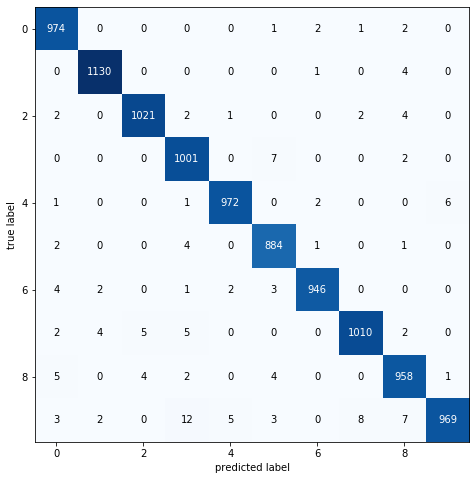

In [55]:
plot_confusion_matrix(mat,figsize=(8,8))

In [56]:
mat

array([[ 974,    0,    0,    0,    0,    1,    2,    1,    2,    0],
       [   0, 1130,    0,    0,    0,    0,    1,    0,    4,    0],
       [   2,    0, 1021,    2,    1,    0,    0,    2,    4,    0],
       [   0,    0,    0, 1001,    0,    7,    0,    0,    2,    0],
       [   1,    0,    0,    1,  972,    0,    2,    0,    0,    6],
       [   2,    0,    0,    4,    0,  884,    1,    0,    1,    0],
       [   4,    2,    0,    1,    2,    3,  946,    0,    0,    0],
       [   2,    4,    5,    5,    0,    0,    0, 1010,    2,    0],
       [   5,    0,    4,    2,    0,    4,    0,    0,  958,    1],
       [   3,    2,    0,   12,    5,    3,    0,    8,    7,  969]],
      dtype=int64)